In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
data = pd.read_csv('./house_prices.csv')

In [88]:
data['Neighborhood'] = data['Neighborhood'].astype('category') 

In [89]:
data.head()

,SqFt,Bedrooms,Bathrooms,Neighborhood,Price
0,1790,2,2,East,114300
1,2030,4,2,East,114200
2,1740,3,2,East,114800
3,1980,3,2,East,94700
4,2130,3,3,East,119800


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   SqFt          128 non-null    int64   
 1   Bedrooms      128 non-null    int64   
 2   Bathrooms     128 non-null    int64   
 3   Neighborhood  128 non-null    category
 4   Price         128 non-null    int64   
dtypes: category(1), int64(4)
memory usage: 4.4 KB


In [91]:
data.describe()

,SqFt,Bedrooms,Bathrooms,Price
count,128.000000,128.000000,128.000000,128.000000
mean,2000.937500,3.023438,2.445312,130427.343750
std,211.572431,0.725951,0.514492,26868.770371
min,1450.000000,2.000000,2.000000,69100.000000
25%,1880.000000,3.000000,2.000000,111325.000000
50%,2000.000000,3.000000,2.000000,125950.000000
75%,2140.000000,3.000000,3.000000,148250.000000
max,2590.000000,5.000000,4.000000,211200.000000


D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


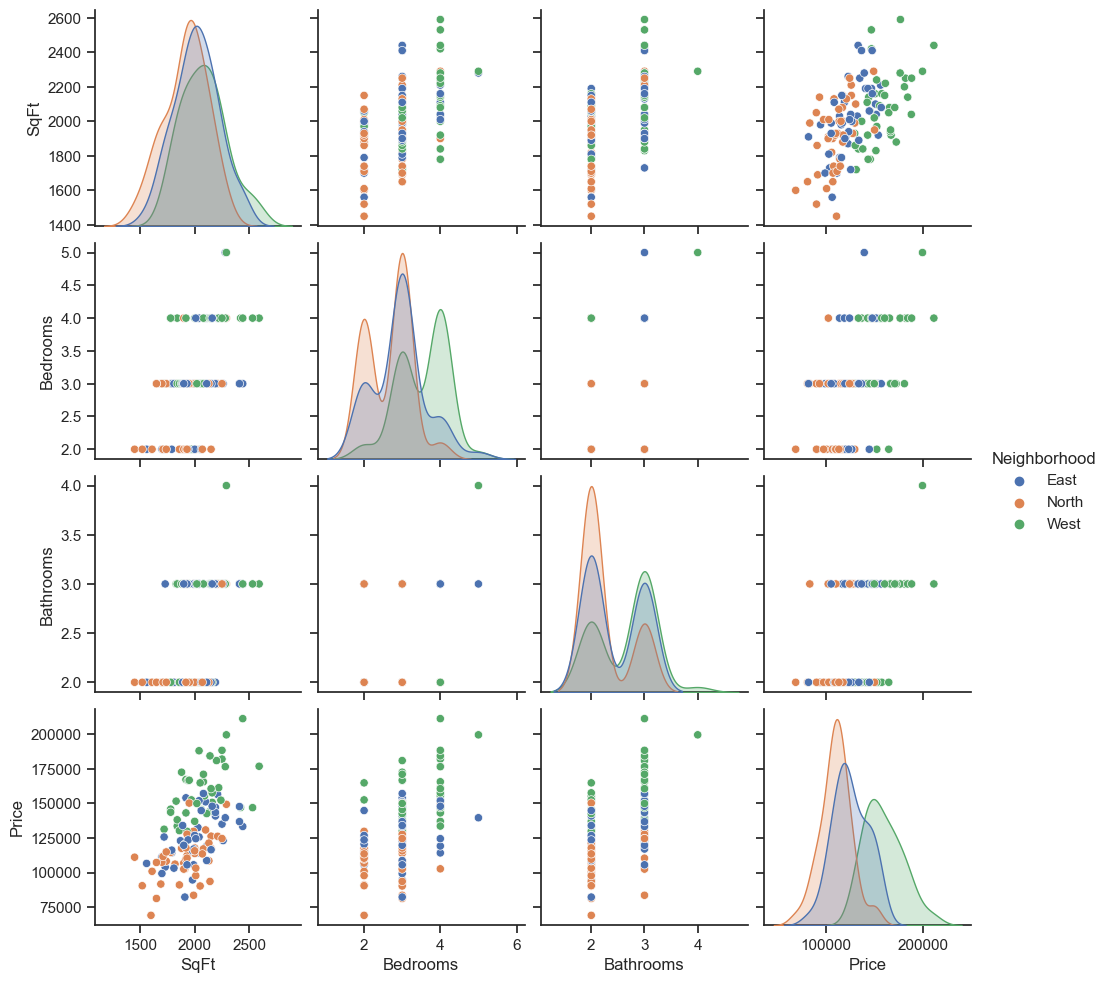

In [41]:
sns.set(style='ticks')
sns.pairplot(
    data=data,
    hue='Neighborhood',
)

<Axes: >

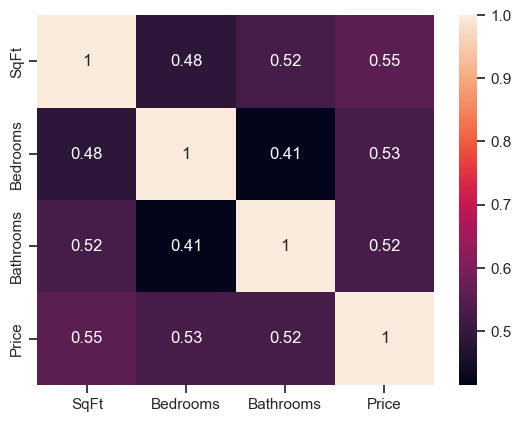

In [9]:
correlation_matrix = data[['SqFt', 'Bedrooms', 'Bathrooms', 'Price']].corr()

sns.heatmap(
    correlation_matrix,
    annot=True,
)

In [38]:
X = data[['SqFt','Bedrooms','Bathrooms','Neighborhood']]
y = data['Price'].to_numpy()
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Neighborhood'])], remainder='passthrough')
X = ct.fit_transform(X)
# Split dataset into training and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3020)

In [39]:
# Train and predict with linear regression model
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred_train = LR.predict(X_train)
y_pred_test = LR.predict(X_test)

In [40]:
# Evaluate the fitted model with MSE
from sklearn.metrics import mean_squared_error
MSE_train = mean_squared_error(y_pred_train, y_train)
MSE_test = mean_squared_error(y_pred_test, y_test)
print("MSE_train:", MSE_train)
print("MSE_test:", MSE_test)

MSE_train: 201089508.69690457
MSE_test: 248597410.68059832


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
data = pd.read_csv('./diabetes.csv')
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [84]:
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.629575e-16,1.309912e-16,-8.015207e-16,1.322472e-16,-8.665768e-17,1.321216e-16,-4.558947e-16,3.923458e-16,-3.853127e-16,-3.385929e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [73]:
X = data[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']].to_numpy()
y = data['target'].to_numpy()

In [78]:
def linear_regression(X, y, step_size, iter_step):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    loss_history = []

    for i in range(iter_step):
        # Compute predictions
        y_pred = np.dot(X, weights) + bias
        

        # Compute gradients
        dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
        db = (1 / n_samples) * np.sum(y_pred - y)

        # Update parameters
        weights -= step_size * dw
        bias -= step_size * db
        
        loss = mean_squared_error(y_pred, y)
        loss_history.append(loss)
        
    plt.plot(range(iter_step), loss_history, label='Training Loss')
    plt.xlabel("Iterations")
    plt.ylabel("RMSE")
    plt.title("Loss Curves during Training")
    plt.show()
    return weights, bias

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3020)

step_size: 0.1
iter_step: 100


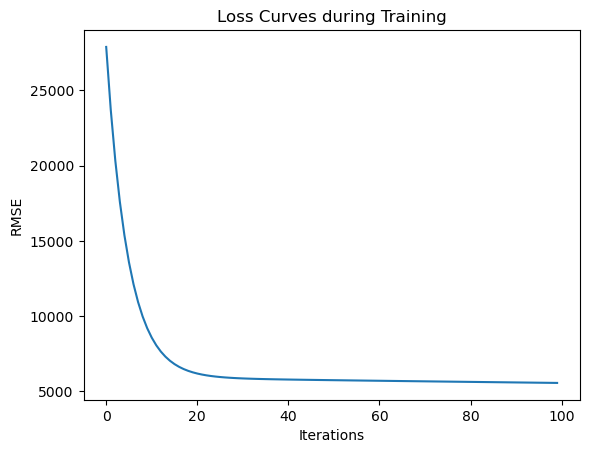

MSE_train: 5546.864646667459
MSE_test: 5692.517888348064


step_size: 0.1
iter_step: 1000


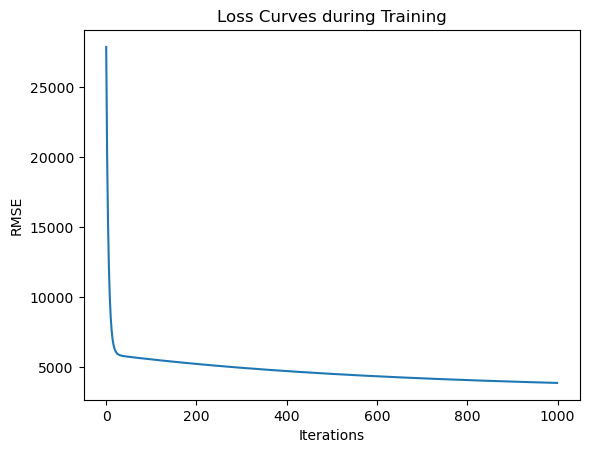

MSE_train: 3861.9671931682683
MSE_test: 4271.376747554577


step_size: 0.1
iter_step: 10000


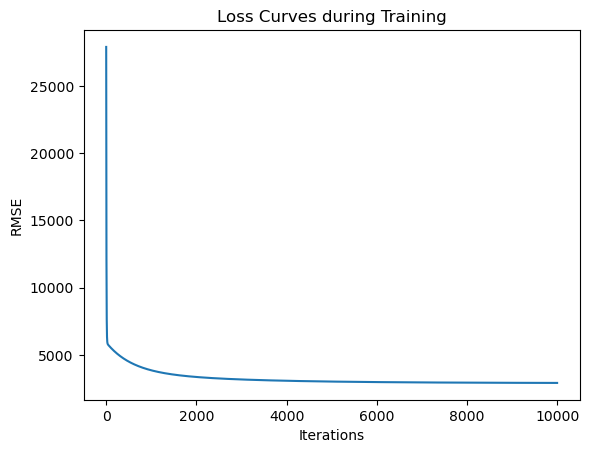

MSE_train: 2924.4584061803266
MSE_test: 2994.7085727129615


step_size: 0.01
iter_step: 100


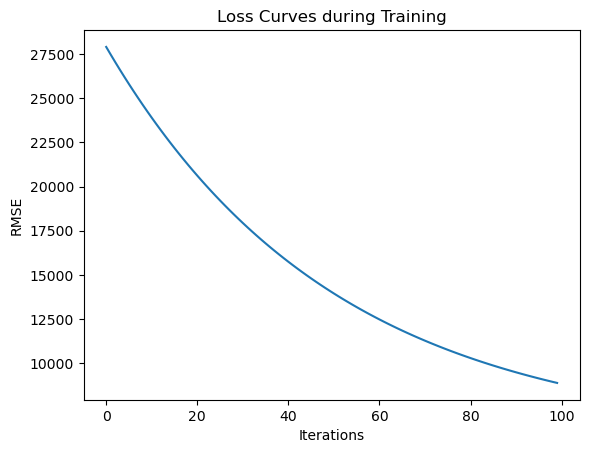

MSE_train: 8833.69602320501
MSE_test: 11026.226586840132


step_size: 0.01
iter_step: 1000


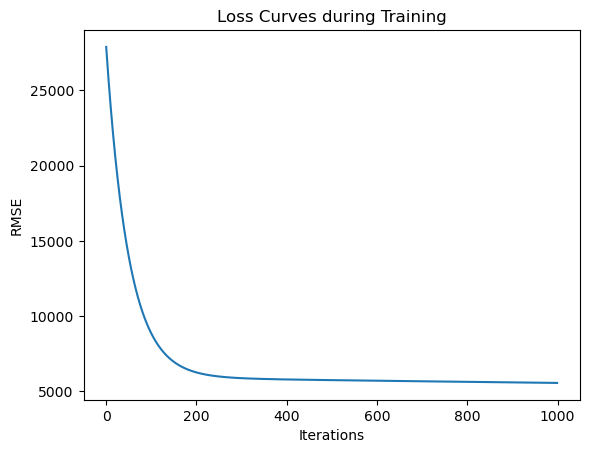

MSE_train: 5546.997787744946
MSE_test: 5692.715213831316


step_size: 0.01
iter_step: 10000


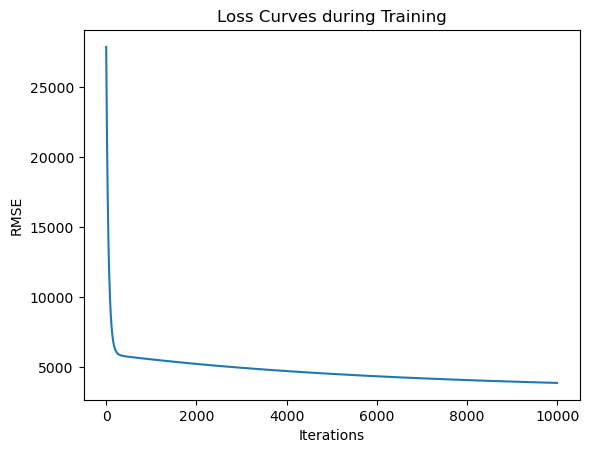

MSE_train: 3862.2433220053304
MSE_test: 4271.560433178849


step_size: 0.001
iter_step: 100


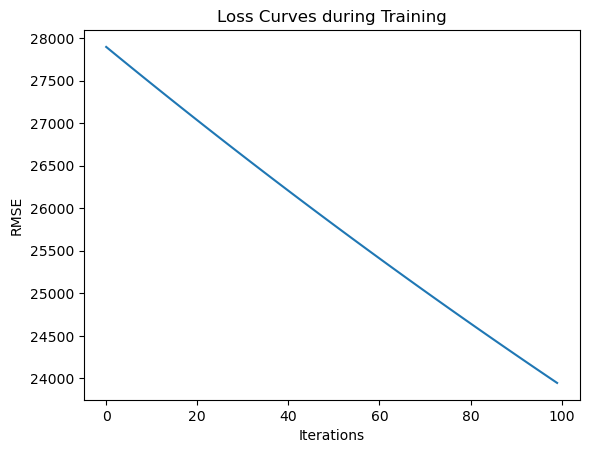

MSE_train: 23909.81557758333
MSE_test: 29205.856619597456


step_size: 0.001
iter_step: 1000


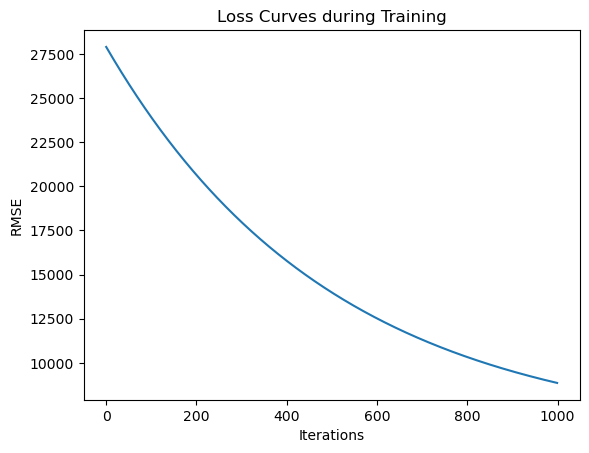

MSE_train: 8860.500356216115
MSE_test: 11062.576980749705


step_size: 0.0001
iter_step: 100


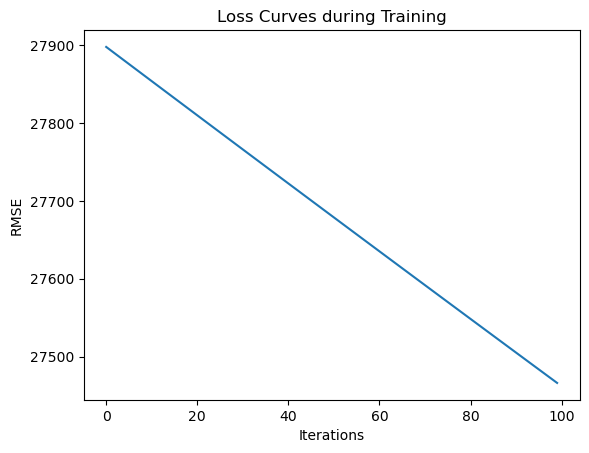

MSE_train: 27462.04538174973
MSE_test: 33250.193370367764


step_size: 0.0001
iter_step: 1000


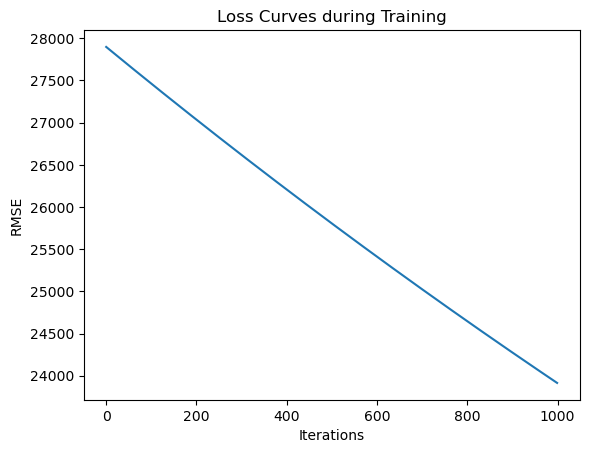

MSE_train: 23911.435241965977
MSE_test: 29207.710836370425




In [83]:
for step_size, iter_step in [(0.1, 100), (0.1, 1000), (0.1, 10000), (0.01, 100), (0.01, 1000),(0.01, 10000), (0.001, 100), (0.001, 1000), (0.0001, 100), (0.0001, 1000)]:
    
    print("step_size:", step_size)
    print("iter_step:", iter_step)
    
    # Train the model
    weights, bias = linear_regression(X_train, y_train, step_size, iter_step)

    y_pred_test = np.dot(X_test, weights) + bias
    y_pred_train = np.dot(X_train, weights) + bias

    MSE_train = mean_squared_error(y_pred_train, y_train)
    MSE_test = mean_squared_error(y_pred_test, y_test)
    print("MSE_train:", MSE_train)
    print("MSE_test:", MSE_test)
    print()
    print()